<a href="https://colab.research.google.com/github/Listin4ever/BertSentimentAnalysis/blob/main/BERT_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#pip install torch
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [5]:
from google.colab import drive
#used for muonting the drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# here is the path of data /content/drive/MyDrive/Data/smileannotationsfinal.csv
#load data
df = pd.read_csv('/content/drive/MyDrive/Data/smile-annotations-final-positive-negative.csv',
                 names = ['id', 'text', 'category'])

#reset index
df.set_index('id', inplace = True)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#preview
df.head()

,text,category
id,,
6.118570e+17,@aandraous @britishmuseum @AndrewsAntonio Merc...,nocode
6.144850e+17,Dorian Gray with Rainbow Scarf #LoveWins (from...,positive
6.147470e+17,@SelectShowcase @Tate_StIves ... Replace with ...,positive
6.148780e+17,@Sofabsports thank you for following me back. ...,positive
6.119320e+17,@britishmuseum @TudorHistory What a beautiful ...,positive


In [10]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3085 entries, 6.11857e+17 to 6.11567e+17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      3085 non-null   object
 1   category  3085 non-null   object
dtypes: object(2)
memory usage: 72.3+ KB


In [11]:
#check for null
df.isnull().sum()

text        0
category    0
dtype: int64

In [12]:
#look at an example
df.text.iloc[1]

'Dorian Gray with Rainbow Scarf #LoveWins (from @britishmuseum http://t.co/Q4XSwL0esu) http://t.co/h0evbTBWRq'

In [13]:
#count for each class
df.category.value_counts()

nocode                        1572
positive                      1172
not-relevant                   214
negative                        95
negative|negative               11
positive|positive               11
positive|negative                9
negative|negative|negative       1
Name: category, dtype: int64

In [14]:
#drop irrelevent class
df = df[~df.category.str.contains('\|')]

In [15]:
#drop irrelevent class
df = df[df.category != 'nocode']
df = df[df.category != 'not-relevant']


In [16]:
#final classes
df.category.value_counts()

positive    1172
negative      95
Name: category, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot class distribution
#plt.figure(figsize=(10, 5))
#sns.countplot(df.category, palette='Spectral')
#plt.xlabel('Classes')
#plt.title('Class Distribution');

In [18]:
#store classes into an array
possible_labels = df.category.unique()
possible_labels

array(['positive', 'negative'], dtype=object)

In [19]:
#convert labels into numeric values
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [20]:
label_dict

{'positive': 0, 'negative': 1}

In [21]:
#convert labels into numeric values
df['label'] = df.category.replace(label_dict)
df.head(10)

,text,category,label
id,,,
6.144850e+17,Dorian Gray with Rainbow Scarf #LoveWins (from...,positive,0
6.147470e+17,@SelectShowcase @Tate_StIves ... Replace with ...,positive,0
6.148780e+17,@Sofabsports thank you for following me back. ...,positive,0
6.119320e+17,@britishmuseum @TudorHistory What a beautiful ...,positive,0
6.115700e+17,@NationalGallery @ThePoldarkian I have always ...,positive,0
6.145000e+17,Lucky @FitzMuseum_UK! Good luck @MirandaStearn...,positive,0
6.136020e+17,Yr 9 art students are off to the @britishmuseu...,positive,0
6.126480e+17,@BarbyWT @britishmuseum so beautiful,positive,0
6.149120e+17,@britishmuseum awesome museum,positive,0


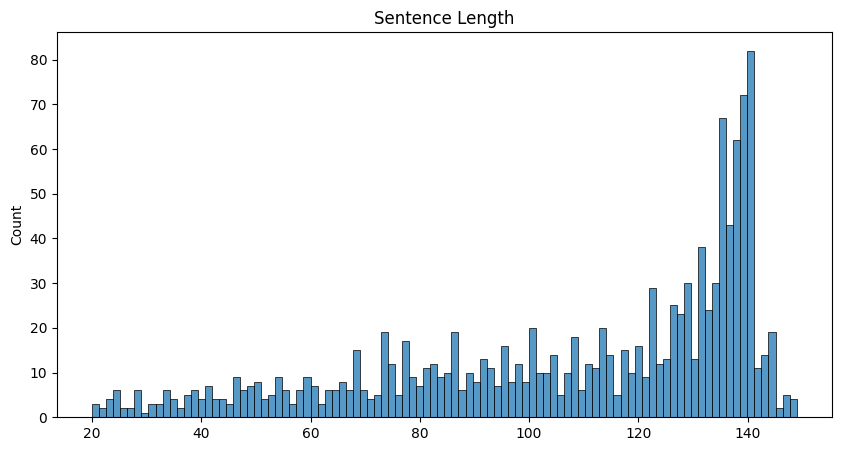

In [22]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()

In [23]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)

Max length:  149


Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                   df.label.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label.values)
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()

,text,category,label,data_type
id,,,,
6.144850e+17,Dorian Gray with Rainbow Scarf #LoveWins (from...,positive,0,not_set
6.147470e+17,@SelectShowcase @Tate_StIves ... Replace with ...,positive,0,not_set
6.148780e+17,@Sofabsports thank you for following me back. ...,positive,0,not_set
6.119320e+17,@britishmuseum @TudorHistory What a beautiful ...,positive,0,not_set
6.115700e+17,@NationalGallery @ThePoldarkian I have always ...,positive,0,not_set


In [25]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.groupby(['category', 'label', 'data_type']).count()

text
category label data_type      
negative 1     train        73
               val          22
positive 0     train       923
               val         249

Tokenization

In [26]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [27]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [28]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')
encoded_data_train

{'input_ids': tensor([[  101,  1030, 27034,  ...,     0,     0,     0],
        [  101,  1030, 10682,  ...,     0,     0,     0],
        [  101,  1030,  2329,  ...,     0,     0,     0],
        ...,
        [  101,  1523,  1030,  ...,     0,     0,     0],
        [  101, 11047,  1030,  ...,     0,     0,     0],
        [  101,  1030,  3680,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

Encoding

In [29]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label.values)
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label.values)
input_ids_train

tensor([[  101,  1030, 27034,  ...,     0,     0,     0],
        [  101,  1030, 10682,  ...,     0,     0,     0],
        [  101,  1030,  2329,  ...,     0,     0,     0],
        ...,
        [  101,  1523,  1030,  ...,     0,     0,     0],
        [  101, 11047,  1030,  ...,     0,     0,     0],
        [  101,  1030,  3680,  ...,     0,     0,     0]])

In [30]:
attention_masks_train

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [31]:
labels_train

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [32]:
#create dataloader
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                             attention_masks_val,
                             labels_val)
print(len(dataset_train))
print(len(dataset_val))


996
271


In [33]:
dataset_train

In [34]:
dataset_train.tensors

(tensor([[  101,  1030, 27034,  ...,     0,     0,     0],
         [  101,  1030, 10682,  ...,     0,     0,     0],
         [  101,  1030,  2329,  ...,     0,     0,     0],
         ...,
         [  101,  1523,  1030,  ...,     0,     0,     0],
         [  101, 11047,  1030,  ...,     0,     0,     0],
         [  101,  1030,  3680,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Set Up BERT Pretrained Model

In [35]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
#model summary
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Create Data Loaders

In [37]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [38]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics

In [40]:
#preds = [0.9 0.05 0.05 0 0 0]
#preds = [1 0 0 0 0 0]
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer
    model.eval()

    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():
            outputs = model(**inputs)

        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

Train Model

In [41]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cpu


In [42]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0

    #set up progress bar
    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()

        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

    tqdm.write('\nEpoch {epoch}')

    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.29138723503888014


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.24937233929004934
F1 Score (weighted): 0.8799460686914562


Epoch 2:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.16165771130958653


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.22420806746878144
F1 Score (weighted): 0.9545510974974502


Epoch 3:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.0790922406426889


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.12884505829101223
F1 Score (weighted): 0.9768409755810704


Epoch 4:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.037605833571477155


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.1571604869774698
F1 Score (weighted): 0.969835881215955


Epoch 5:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.023267088259124276


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.18231642193536068
F1 Score (weighted): 0.9710619336207388


Epoch 6:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.020960117134370328


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.2222091694841058
F1 Score (weighted): 0.977859778597786


Epoch 7:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.018814827366528685


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.1626467843161663
F1 Score (weighted): 0.977859778597786


Epoch 8:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.015221525063767682


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.19106752738621757
F1 Score (weighted): 0.9710619336207388


Epoch 9:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.01051821854603935


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.23899222062350922
F1 Score (weighted): 0.9710619336207388


Epoch 10:   0%|          | 0/249 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.007488576241291547


  0%|          | 0/9 [00:00<?, ?it/s]

Validation loss: 0.18648471615839904
F1 Score (weighted): 0.9744307583920909


Model Evaluation

In [43]:
outputs.loss

tensor(0.0002, grad_fn=<NllLossBackward0>)

In [44]:
outputs.logits

tensor([[ 4.5011, -4.2058],
        [ 4.2222, -4.3016],
        [ 4.3647, -4.0696],
        [ 4.4340, -4.2363]], grad_fn=<AddmmBackward0>)

In [45]:
#save model
model.to(device)
pass

In [46]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/9 [00:00<?, ?it/s]

In [63]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: positive
Accuracy:245/249

Class: negative
Accuracy:19/22



In [77]:
input = "I am glad to have you, thankyou for helping me"


In [78]:
encoded_input = tokenizer(input, return_tensors='pt', padding=True, truncation=True)

In [79]:
with torch.no_grad():
    outputs = model(**encoded_input)

# Get the predicted logits
logits = outputs.logits

# Apply softmax to get probabilities
probabilities = torch.softmax(logits, dim=1)

# Get the predicted label (class with the highest probability)
predicted_label = torch.argmax(probabilities, dim=1).item()

# Decode the predicted label using the model's config
label_names = model.config.id2label
predicted_sentiment = label_names[predicted_label]

In [80]:
print(f"Predicted sentiment: {predicted_sentiment}")

Predicted sentiment: LABEL_0


In [85]:
# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize the input text
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**encoded_input)

    # Get the predicted logits
    logits = outputs.logits

    # Apply softmax to get probabilities
    probabilities = torch.softmax(logits, dim=1)

    # Get the predicted label (class with the highest probability)
    predicted_label = torch.argmax(probabilities, dim=1).item()

    # Decode the predicted label using the model's config
    label_names = model.config.id2label
    predicted_sentiment = label_names[predicted_label]

    return predicted_sentiment

# Take user input
user_text = "She is mad at you. "

# Predict sentiment
predicted_sentiment = predict_sentiment(user_text)
print(f"Predicted sentiment: {predicted_sentiment}")


Predicted sentiment: LABEL_1
